In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# read flags.csv
df_flags = pd.read_csv("flags.csv")
df_flags['image_name']
filenames = []
for i in range(len(df_flags['image_name'])):
    filenames.append("./flags/" + df_flags['image_name'][i].split(".")[0] + ".png")

In [17]:
# read images in grayscale
images = []
for i in range(len(filenames)):
    images.append(cv2.imread(filenames[i], cv2.IMREAD_GRAYSCALE))
    #reshape image to 256x256
    images[i] = cv2.resize(images[i], (256, 256))


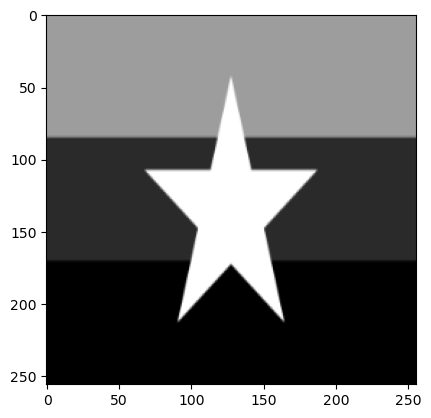

In [20]:
# display image 0
plt.imshow(images[25], cmap='gray')
plt.show()

In [3]:
# harris -> hog -> bag of features -> kmeans -> cluster

In [27]:
def harris_corners(img):
    gray = np.float32(img)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst, 0.01*dst.max(), 255, 0)
    dst = np.uint8(dst)
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    return corners

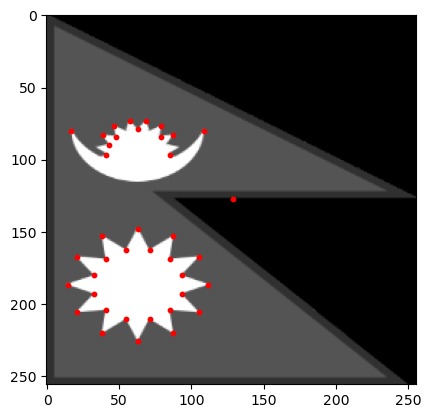

In [51]:
# display corners on image
img = cv2.imread(filenames[45], cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
corners = harris_corners(img)
plt.imshow(img, cmap='gray')
plt.scatter(corners[:,0], corners[:,1], s=10, c='r')
plt.show()



In [80]:
corners.shape

(39, 2)

In [65]:
def histogram_of_oriented_gradients(image):
    hog_features = []
    sobel_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_operator_t = np.transpose(sobel_operator)
    dx = cv2.filter2D(image, -1, sobel_operator)
    dy = cv2.filter2D(image, -1, sobel_operator_t)
    magnitude = np.sqrt(np.square(dx) + np.square(dy))
    theta = np.arctan2(dy, dx)
    theta = np.rad2deg(theta)
    theta[theta < 0] += 180
    theta = theta.astype(int)

    for i in range(0, 256, 8):
        for j in range(0, 256, 8):
            histogram = np.zeros(8)
            for k in range(8):
                for l in range(8):
                    histogram[theta[i+k, j+l]//45] += magnitude[i+k, j+l]
            hog_features.append(histogram)
    return np.asarray(hog_features)

In [107]:
def bag_of_features(images):
    hog_features = []
    for image in images:
        hog_features.append(histogram_of_oriented_gradients(image))
    corners = []
    for image in images:
        corners.append(harris_corners(image))
    features = []
    for i in range(len(images)):
        for j in range(len(hog_features[i])):
            for k in range(len(corners))
            features.append(np.concatenate((hog_features[i][j], corners[i][j])))
    return np.asarray(features)

In [108]:
bag_of_features(images[20:30])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [106]:
len(images[20:30])

10